# Assignment 06 Data Science : Multiple Linear Regression

Import csv data
Load the required libraries

In [1]:
#pip install pandas - 1 time activity

In [2]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
#pip show scikit-learn - to check the sklearn version

In [4]:
data = pd.read_csv("ToyotaCorolla - MLR.csv")

In [5]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [14]:
#Splitting the data in 0:2 ratio (20% testing, 80% training)
from sklearn.model_selection import train_test_split
y = data.Price
x = data.drop('Price',axis=1)


In [15]:
x.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

In [22]:
print("shape of the original data set:",data.shape)
print("shape of the input- training set", x_train.shape)
print("shape of the output - training set", y_train.shape)
print("shape of the input - testing set", x_test.shape)
print("shape of the output- testing set", y_test.shape)

shape of the original data set: (1436, 11)
shape of the input- training set (1148, 10)
shape of the output - training set (1148,)
shape of the input - testing set (288, 10)
shape of the output- testing set (288,)


In [23]:
#Map the correlation Matrix
x_train.corr()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Age_08_04,1.000000,0.501967,-0.165324,0.046065,-0.099903,-0.145560,NaN,-0.003979,-0.460526
KM,0.501967,1.000000,-0.356446,-0.086479,0.092363,-0.029258,NaN,0.000580,-0.016197
HP,-0.165324,-0.356446,1.000000,0.009900,0.032591,0.092834,NaN,0.204780,0.077853
Automatic,0.046065,-0.086479,0.009900,1.000000,0.083405,-0.030873,NaN,-0.077858,0.040001
cc,-0.099903,0.092363,0.032591,0.083405,1.000000,0.085888,NaN,0.011189,0.320813
Doors,-0.145560,-0.029258,0.092834,-0.030873,0.085888,1.000000,NaN,-0.169711,0.296260
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.003979,0.000580,0.204780,-0.077858,0.011189,-0.169711,NaN,1.000000,0.017159
Weight,-0.460526,-0.016197,0.077853,0.040001,0.320813,0.296260,NaN,0.017159,1.000000


Observations below points are part of EDA
1. Input variables like Age_08_04 and HP, Dooors, Gears is inverse correlation & the correlation is weak correlation
2. Relation between Age_08_04 and KM is positive correlation and are moderately related
3. Price (Output/ dependent variable) is dependent on all independent variables

# Scatter plot between variables along with histograms


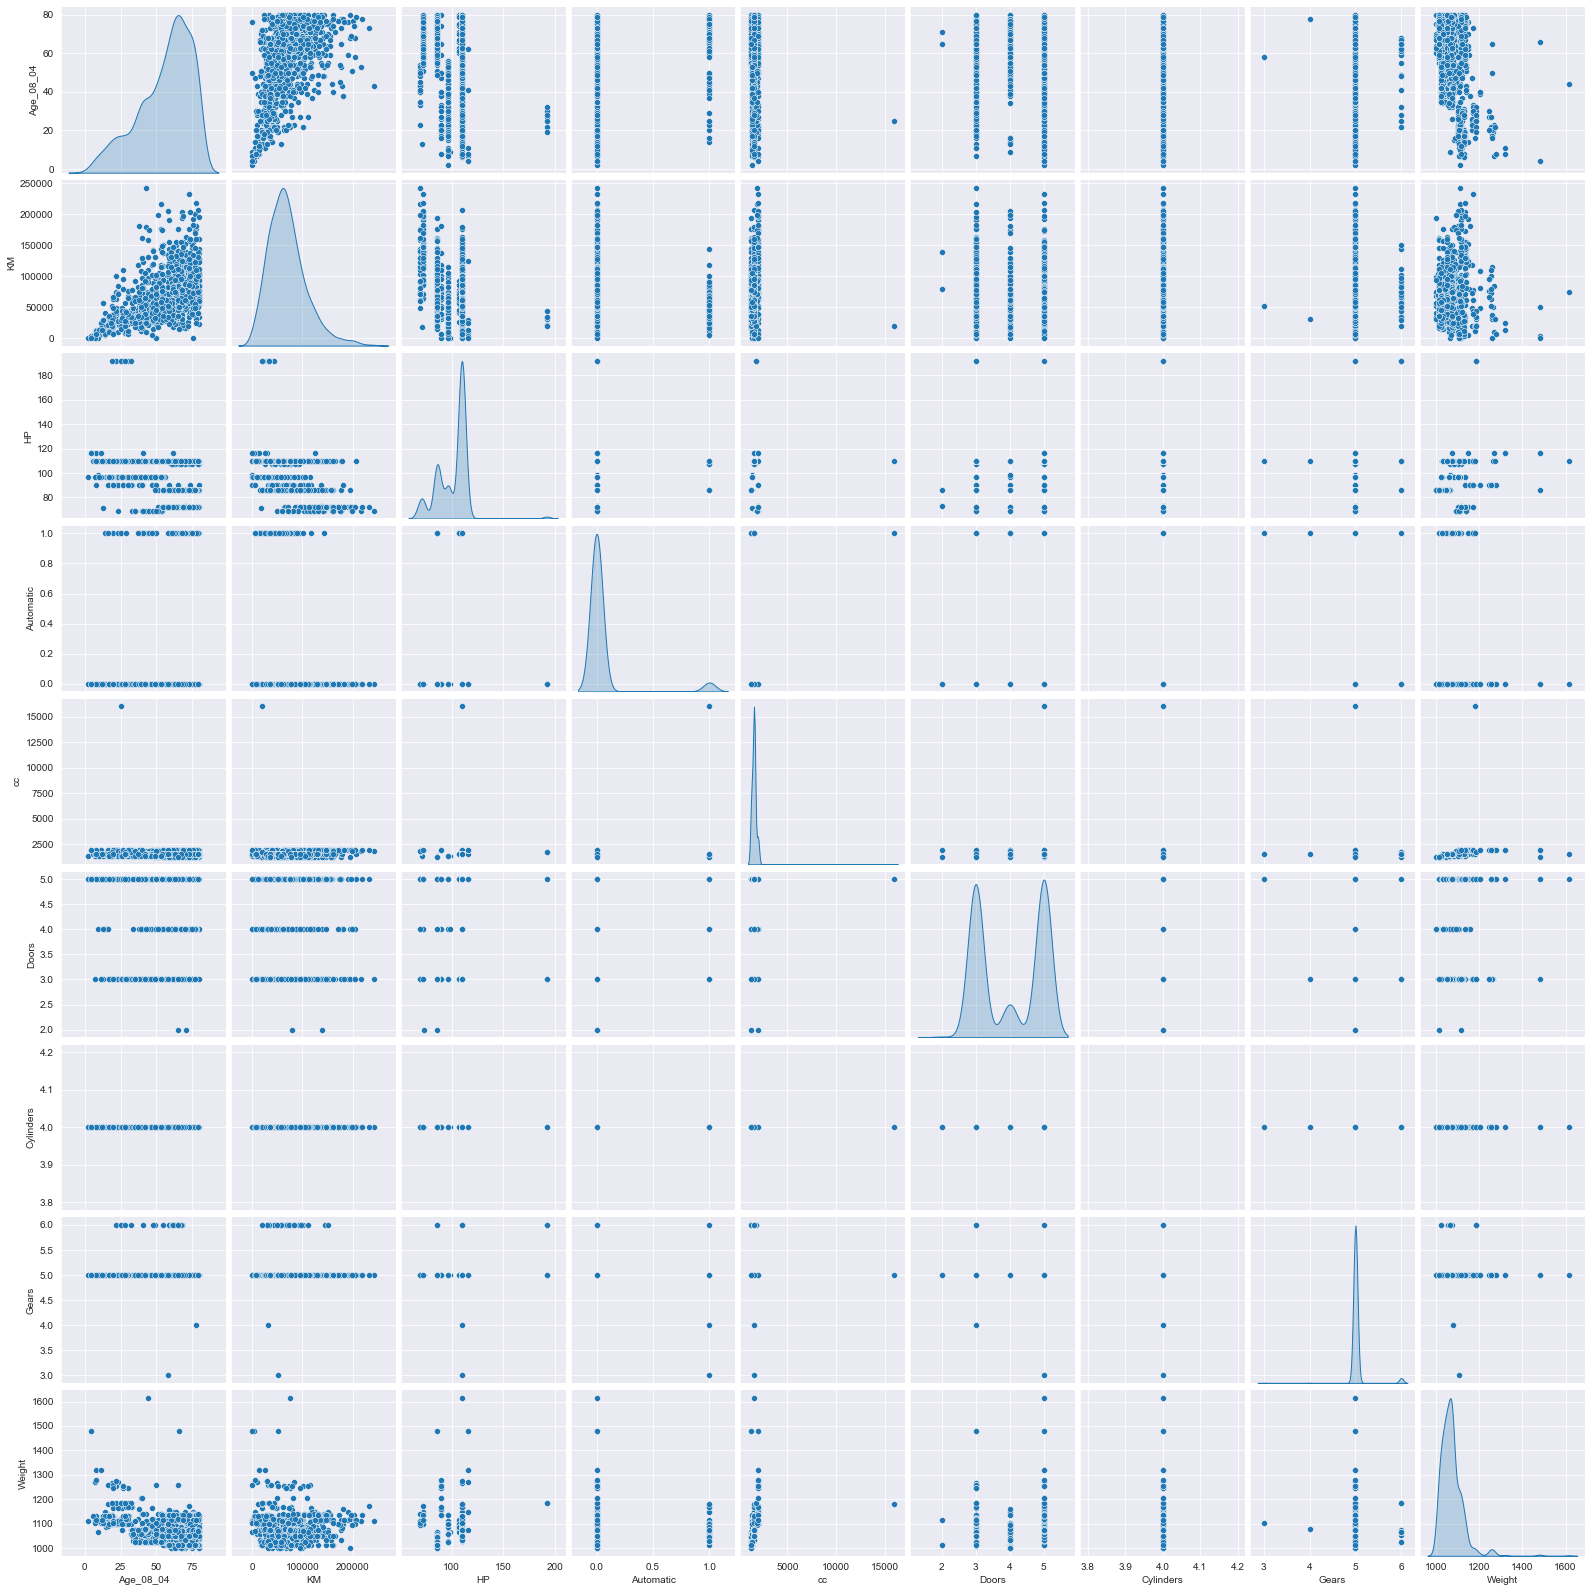

In [24]:
sns.set_style(style ='darkgrid')
sns.pairplot(x_train, diag_kind ='kde')
plt.show()

# Model build with all features

In [27]:
#Preparing the model 
#Build the model, Price is the OP
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data = data).fit()

In [28]:
model.params

Intercept    -419.405531
Age_08_04    -123.084400
KM             -0.019455
HP             28.499119
Automatic     376.315487
cc             -0.100953
Doors          -4.148726
Cylinders   -1677.622124
Gears         670.616336
Weight         18.622299
dtype: float64

In [29]:
#t value and p values
print(model.tvalues, '\n', model.pvalues)


Intercept    -5.414503
Age_08_04   -46.691362
KM          -15.870731
HP           10.902844
Automatic     2.377447
cc           -1.125551
Doors        -0.103628
Cylinders    -5.414503
Gears         3.383045
Weight       21.412318
dtype: float64 
 Intercept     7.202023e-08
Age_08_04    1.214440e-289
KM            2.316427e-52
HP            1.214261e-26
Automatic     1.756409e-02
cc            2.605449e-01
Doors         9.174788e-01
Cylinders     7.202023e-08
Gears         7.362823e-04
Weight        1.983857e-88
dtype: float64


In [30]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sat, 28 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:50:50   Log-Likelihood:                -12377.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -419.4055     77.460     -5.415      0.000    -571.353    -267.459
Age_08_04   -123.0844      2.636    -46.691      0.000    -128.256    -117.913
KM            -0.0195      0.001    -15.871      0.000      -0.022      -0.017
HP            28.4991      2.614     10.903      0.000      23.372      33.627
Automatic    376.3155    158.286      2.377      0.018      65.818     686.813
cc            -0.1010      0.090     -1.126      0.261      -0.277       0.075
Doors         -4.1487     40.035     -0.104      0.917     -82.682      74.384
Cylinders  -1677.6221    309.839     -5.415      0.000   -2285.410   -1069.834
Gears        670.6163    198.229      3.383      0.001     281.766    1059.467
Weight        18.6223      0.870     21.412      0.000      16.916      20.328
==============================================================================
Omnibus:                      198.860   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1588.274
Skew:                          -0.371   Prob(JB):                         0.00
Kurtosis:                       8.099   Cond. No.                     2.01e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Calculate VIF


In [31]:
rsq_hp = smf.ols('HP~Age_08_04+KM+Cylinders', data = x_train).fit()
rsq_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     83.51
Date:                Sat, 28 Dec 2024   Prob (F-statistic):           1.40e-34
Time:                        18:51:08   Log-Likelihood:                -4654.5
No. Observations:                1148   AIC:                             9315.
Df Residuals:                    1145   BIC:                             9330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4792      0.078     82.846      0.000       6.326       6.633
Age_08_04      0.0148      0.026      0.570      0.569      -0.036       0.066
KM            -0.0001   1.25e-05    -11.453      0.000      -0.000      -0.000
Cylinders     25.9169      0.313     82.846      0.000      25.303      26.531
==============================================================================
Omnibus:                      369.299   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3482.316
Skew:                           1.204   Prob(JB):                         0.00
Kurtosis:                      11.186   Cond. No.                     2.86e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.76e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
rsq_hp = rsq_hp.rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.1458704317340207

# Q-Q plot

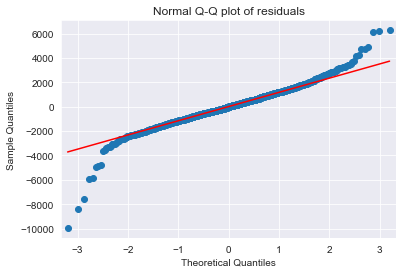

In [33]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [34]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  127,
         128,  134,  136,  138,  139,  141,  142,  143,  144,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         183,  190,  194,  196,  197,  201,  204,  205,  210,  211,  216,
         223,  230,  232,  233,  237, 

# Residual plot for Homoscedasticity

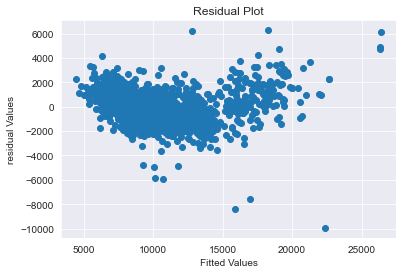

In [35]:
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('residual Values')
plt.show()

In [36]:
def get_standardized_values(vals):
    return(vals -vals.mean()/vals.std())

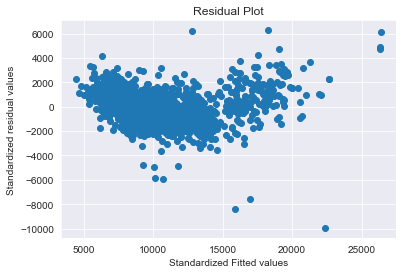

In [37]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


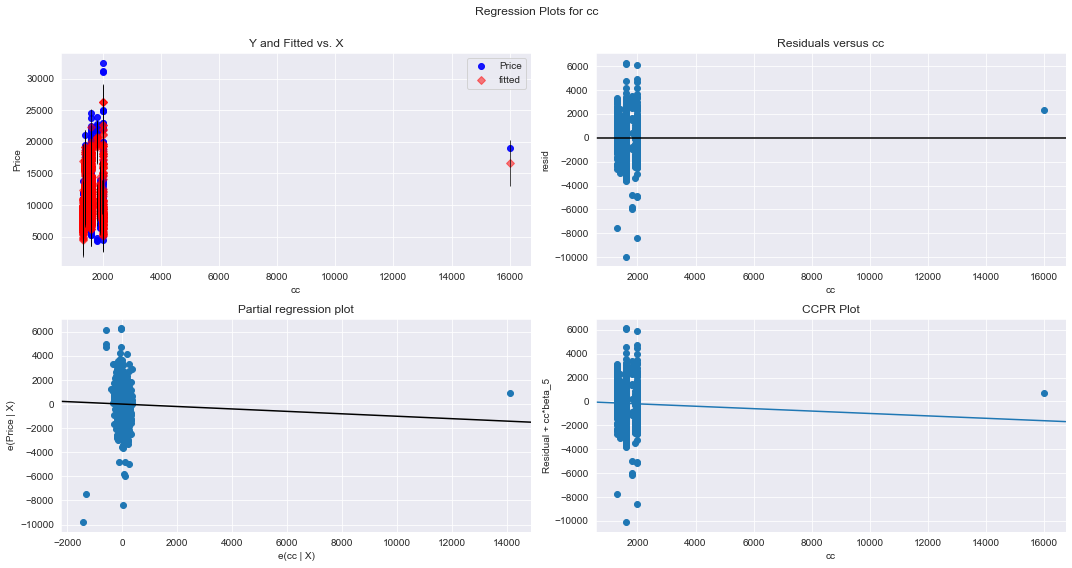

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"cc",fig = fig)

# Model Diagnostics
Detecting Influencers/Outliers
Cook's Distance

In [40]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

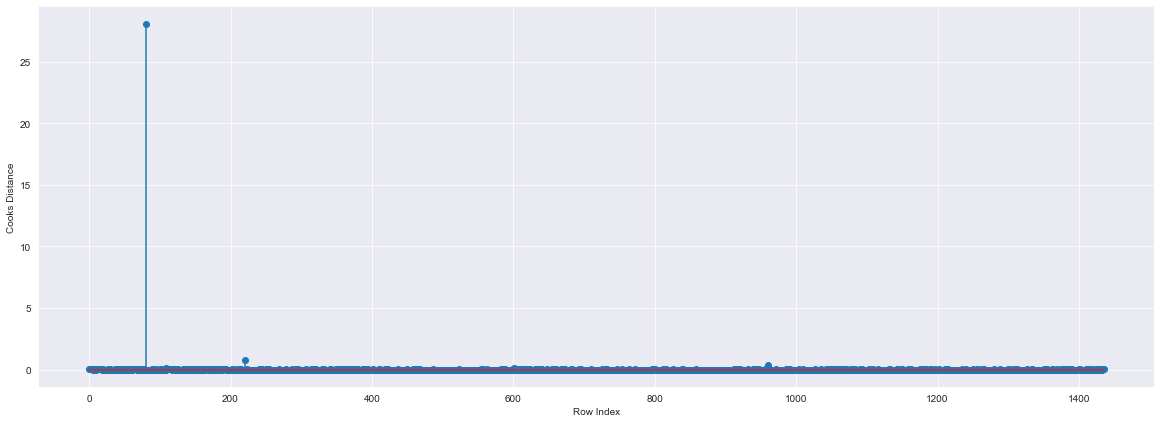

In [48]:
#plot the influencers value using stem plot
fig = plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
#plt.stem(np.arange(len(x_train)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
#Most influencing point in data set
(np.argmax(c),np.max(c))

(80, 28.097164766926937)

In [50]:
x_train.tail()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1074,69,146304,Diesel,72,0,2000,3,4,5,1115
198,42,105699,Petrol,97,0,1400,3,4,5,1025
499,53,57948,Petrol,97,0,1400,3,4,5,1025
695,67,96000,Petrol,110,0,1600,3,4,5,1050
1016,65,35283,Petrol,86,0,1300,3,4,5,1015


In [52]:
x_train.describe()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1148.000000,1148.000000,1148.00000,1148.000000,1148.000000,1148.000000,1148.0,1148.000000,1148.000000
mean,56.078397,69160.171603,101.06446,0.053136,1577.932927,4.009582,4.0,5.027875,1072.216899
std,18.404800,38114.113550,14.93932,0.224402,466.757905,0.954453,0.0,0.184651,53.397581
min,2.000000,1.000000,69.00000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,44.000000,42817.250000,86.00000,0.000000,1400.000000,3.000000,4.0,5.000000,1035.000000
50%,61.000000,63455.000000,110.00000,0.000000,1600.000000,4.000000,4.0,5.000000,1065.000000
75%,70.000000,88141.750000,110.00000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,80.000000,243000.000000,192.00000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


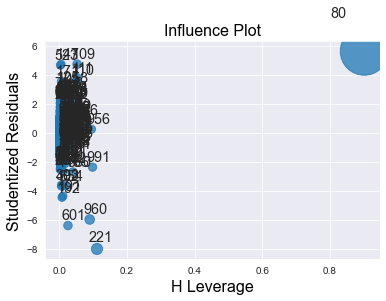

In [54]:
#High influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [55]:
x_train[x_train.index.isin([80, 28.097164766926937])]

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
80,25,20019,Petrol,110,1,16000,5,4,5,1180


In [57]:
x_train1 = x_train.drop(x_train.index[[80, 28]],axis =0).reset_index(drop=True)
x_train1.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,59,154783,Diesel,72,0,2000,3,4,5,1120
1,80,92255,Petrol,107,1,1600,5,4,5,1105
2,76,45410,Petrol,86,0,1300,5,4,5,1035
3,42,38932,Petrol,110,0,1600,3,4,5,1040
4,52,58596,Petrol,110,0,1600,3,4,5,1045


# Build the 2nd model
Exclude the varaibles Weight and generate the R-squared value AIC values

In [60]:
final_ml_v = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears',data = data).fit()

In [61]:
final_ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     926.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:15:28   Log-Likelihood:                -12577.
No. Observations:                1436   AIC:                         2.517e+04
Df Residuals:                    1428   BIC:                         2.521e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    630.8916     68.887      9.158      0.000     495.761     766.022
Age_08_04   -151.3517      2.622    -57.726      0.000    -156.495    -146.209
KM            -0.0129      0.001     -9.469      0.000      -0.016      -0.010
HP            31.7835      2.998     10.600      0.000      25.902      37.665
Automatic    756.4928    180.734      4.186      0.000     401.960    1111.025
cc             0.4338      0.099      4.383      0.000       0.240       0.628
Doors        220.6266     44.393      4.970      0.000     133.544     307.709
Cylinders   2523.5666    275.547      9.158      0.000    1983.046    3064.087
Gears        898.5367    227.451      3.950      0.000     452.364    1344.710
==============================================================================
Omnibus:                      418.888   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3353.084
Skew:                           1.128   Prob(JB):                         0.00
Kurtosis:                      10.138   Cond. No.                     2.00e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Predicting new data i.e. 3rd Model

In [63]:
#New data for prediction
new_data = pd.DataFrame({"Age_08_04": 45, "KM": 5000, "HP":80, "Automatic": 0, "cc":1000, "Doors":5, "Cylinders":5 ,"Gears":4}, index=[1])
new_data

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears
1,45,5000,80,0,1000,5,5,4


In [66]:
final_ml_v.predict(new_data)

1    14047.095154
dtype: float64

# Model Save

In [67]:
import joblib
joblib.dump(final_ml_v,"model.pkl")

['model.pkl']

In [68]:
model_import = joblib.load("model.pkl")

In [69]:
model_import.predict(new_data)

1    14047.095154
dtype: float64